<a href="https://colab.research.google.com/github/woojin-devv/final_project/blob/main/final_(%EB%B9%84%EB%B9%94%EB%B0%A5%20detect%20%EC%95%88%EB%90%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

to. 우진 : [1]에 api 키만 넣고 실행시키시면 됩니다!  

In [1]:
# Roboflow 에서 데이터셋 가져오기 (20종) -> api key 는 마스킹
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="90xz5xcoxb7aCA9EZTkC")
project = rf.workspace("yoon-pvmwt").project("opensource_final_yoon")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to opensource_final_yoon-1 in yolov8:: 100%|██████████| 3852/3852 [00:00<00:00, 4827.21it/s]


Train 이미지 개수: 1680
첫 5개 파일명: ['cherrytomato_027_jpg.rf.f815545b8203726d87dd37779d3bf8f4.jpg', 'chestnut_034_jpg.rf.d0b9c2c9b020313d41e5e9b96651c138.jpg', 'whitepeach_064_jpg.rf.bac02c3d65681992f18eef02d674c49b.jpg', 'whitepeach_014_jpg.rf.e6896ce90a068926b64ff349113e3d4a.jpg', 'banana_066_jpg.rf.41005ca819a783a1a9d9cbd2248a4bd3.jpg']


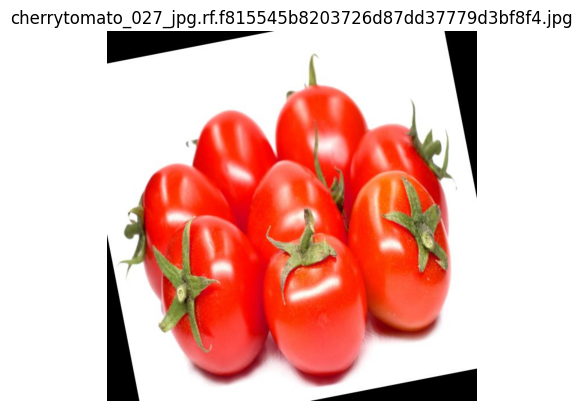

In [2]:
# 데이터셋 내부 train 이미지 확인
import os
from PIL import Image
import matplotlib.pyplot as plt

image_dir = os.path.join(dataset.location, "train", "images")
image_files = os.listdir(image_dir)

print(f"Train 이미지 개수: {len(image_files)}")
print(f"첫 5개 파일명: {image_files[:5]}")

# 첫번째 이미지 시각화
img_path = os.path.join(image_dir, image_files[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title(image_files[0])
plt.axis('off')
plt.show()

In [7]:
# 김치찌개, 비빔밥 포함

data_yaml = """
train: /content/opensource_final_yoon-1/train/images
val: /content/opensource_final_yoon-1/valid/images

nc: 20
names:
  - steamedrice
  - japchae
  - eeldonburi
  - jjajangmyeon
  - tunasandwich
  - chickensteak
  - coldsoymilknoodles
  - pasta
  - grilledribs
  - bakedpotato
  - crabstick
  - marinatedcrab
  - grilledmackerel
  - noodles
  - roastedsweetpotato
  - mungbeansprouts
  - scrambledegg
  - spinach
  - kimchistew
  - bibimbap
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml 생성 완료!")


data.yaml 생성 완료!


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # pretrained 모델 로드

model.train(
    data='data.yaml',
    epochs=100,
    batch=16,
    imgsz=640,
    augment=True,
    project='runs/train',
    name='yolov8n_food',
)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_food2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 755k/755k [00:00<00:00, 23.2MB/s]

Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    755212  ultralytics.nn.modules.head.Detect           [20, [64, 128, 256]]          
Model summary: 129 layers, 3,014,748 parameters, 3,014,732 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 126.9±141.1 MB/s, size: 50.0 KB)


train: Scanning /content/opensource_final_yoon-1/train/labels... 1680 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1680/1680 [00:01<00:00, 902.32it/s]

train: New cache created: /content/opensource_final_yoon-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.0±13.0 MB/s, size: 39.2 KB)


val: Scanning /content/opensource_final_yoon-1/valid/labels... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 627.88it/s]

val: New cache created: /content/opensource_final_yoon-1/valid/labels.cache


Plotting labels to runs/train/yolov8n_food2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov8n_food2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.06G      1.048       3.76      1.542         43        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        160        160      0.501      0.256      0.461      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.54G      1.034      2.453      1.503         32        640: 100%|██████████| 105/105 [00:28<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        160        160      0.637      0.636      0.637      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.56G      1.058        2.1      1.517         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        160        160      0.698      0.526       0.62      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.58G      1.017      1.908      1.466         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        160        160      0.661      0.589      0.664      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.6G     0.9789      1.747      1.441         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        160        160      0.642      0.604       0.64      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.61G     0.9403      1.569      1.401         40        640: 100%|██████████| 105/105 [00:28<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        160        160      0.609      0.642      0.662      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.63G     0.9399      1.497      1.392         40        640: 100%|██████████| 105/105 [00:29<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        160        160        0.6      0.637      0.631      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.65G     0.9134      1.431      1.381         34        640: 100%|██████████| 105/105 [00:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        160        160      0.689      0.721      0.685      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.66G     0.8879      1.352       1.36         34        640: 100%|██████████| 105/105 [00:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        160        160      0.672       0.68      0.705      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.68G     0.8838      1.284      1.347         48        640: 100%|██████████| 105/105 [00:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        160        160      0.738      0.635      0.731      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.7G     0.8934      1.217      1.352         46        640: 100%|██████████| 105/105 [00:28<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        160        160      0.696      0.673        0.7        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.71G     0.8421      1.172       1.31         40        640: 100%|██████████| 105/105 [00:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        160        160      0.752      0.679      0.752      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.73G      0.829      1.121      1.307         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        160        160      0.825      0.757       0.82      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.75G     0.8112       1.08      1.289         34        640: 100%|██████████| 105/105 [00:29<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        160        160      0.699      0.759      0.733       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.77G      0.791      1.032       1.27         33        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        160        160      0.743      0.764      0.768      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.78G     0.7789     0.9976       1.26         35        640: 100%|██████████| 105/105 [00:28<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        160        160      0.679      0.701      0.733      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.8G     0.7865     0.9983      1.267         43        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        160        160      0.716      0.743      0.746      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.82G     0.7743     0.9436      1.259         33        640: 100%|██████████| 105/105 [00:28<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        160        160      0.745      0.753      0.752      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.84G     0.7677     0.9226      1.256         38        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        160        160      0.687      0.733      0.758      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.85G     0.7509     0.8959      1.239         40        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        160        160      0.738       0.75      0.746      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.87G     0.7215      0.876      1.227         33        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        160        160      0.728      0.735      0.742      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.89G     0.7162     0.8592      1.221         38        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        160        160      0.714      0.773      0.776      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.9G     0.7169       0.84      1.212         33        640: 100%|██████████| 105/105 [00:27<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        160        160      0.734      0.781      0.768      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.92G     0.7095     0.8298      1.221         35        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        160        160      0.765      0.759      0.785      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.94G     0.7105     0.8034      1.211         34        640: 100%|██████████| 105/105 [00:28<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        160        160      0.772      0.723      0.765      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.96G     0.6944     0.7844      1.197         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        160        160      0.729      0.747      0.766      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.97G     0.6866     0.7614      1.201         32        640: 100%|██████████| 105/105 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        160        160      0.763      0.742      0.762      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.99G     0.6739     0.7476      1.182         40        640: 100%|██████████| 105/105 [00:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        160        160      0.776      0.647      0.765      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.01G     0.6987     0.7546      1.196         36        640: 100%|██████████| 105/105 [00:29<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        160        160        0.8      0.706      0.765      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.02G     0.6633     0.7393       1.17         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        160        160      0.723      0.774      0.783      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.04G     0.6642     0.7253      1.171         49        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        160        160      0.813      0.682      0.797      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.06G     0.6638     0.7036       1.18         44        640: 100%|██████████| 105/105 [00:28<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        160        160      0.795       0.73      0.766      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.07G     0.6633      0.689      1.169         37        640: 100%|██████████| 105/105 [00:28<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        160        160      0.739      0.776      0.789      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.09G     0.6623     0.6883      1.167         44        640: 100%|██████████| 105/105 [00:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        160        160      0.731      0.796      0.798      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.11G     0.6375     0.6605      1.163         34        640: 100%|██████████| 105/105 [00:28<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        160        160      0.783      0.738      0.767      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.12G     0.6386     0.6756      1.162         37        640: 100%|██████████| 105/105 [00:28<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        160        160      0.757      0.796      0.793      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.14G     0.6365     0.6587      1.157         41        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all        160        160       0.73      0.771      0.784      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.16G     0.6348     0.6469       1.16         33        640: 100%|██████████| 105/105 [00:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all        160        160       0.75      0.737      0.754      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.18G     0.6421     0.6313      1.165         33        640: 100%|██████████| 105/105 [00:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        160        160      0.805      0.741      0.783      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.19G     0.6283     0.6422      1.153         38        640: 100%|██████████| 105/105 [00:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        160        160       0.83      0.746       0.78      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.21G     0.6027      0.605       1.13         39        640: 100%|██████████| 105/105 [00:29<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        160        160      0.748       0.75      0.761      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.23G     0.6086     0.6052       1.14         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        160        160      0.708      0.773      0.767      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.25G      0.592      0.594      1.124         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        160        160      0.715      0.805      0.772      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.26G     0.6131     0.5944      1.132         31        640: 100%|██████████| 105/105 [00:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        160        160      0.779      0.788      0.796      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.28G     0.5962     0.5792      1.131         41        640: 100%|██████████| 105/105 [00:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all        160        160        0.8       0.72      0.786      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.3G     0.5847     0.5674      1.125         39        640: 100%|██████████| 105/105 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        160        160      0.734      0.775       0.79       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.31G      0.589     0.5733       1.12         32        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        160        160      0.793      0.726      0.771      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.33G     0.5825     0.5549      1.116         30        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        160        160      0.784      0.786      0.775      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.35G     0.5803     0.5582      1.119         30        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        160        160      0.742      0.782      0.779      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.37G     0.5704     0.5432      1.113         44        640: 100%|██████████| 105/105 [00:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        160        160      0.725      0.823      0.797      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.38G     0.5702     0.5452      1.114         35        640: 100%|██████████| 105/105 [00:27<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        160        160      0.802      0.754      0.778       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.4G     0.5766     0.5417      1.111         43        640: 100%|██████████| 105/105 [00:27<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        160        160      0.771      0.813      0.799      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.42G     0.5758     0.5232      1.109         36        640: 100%|██████████| 105/105 [00:27<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        160        160       0.84      0.764      0.808      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.43G     0.5621     0.5396      1.106         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        160        160      0.801      0.768       0.77      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.45G     0.5586     0.5217      1.104         40        640: 100%|██████████| 105/105 [00:27<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        160        160      0.835      0.797      0.797      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.47G     0.5572     0.5125      1.103         35        640: 100%|██████████| 105/105 [00:27<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        160        160      0.783      0.776      0.803      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.48G     0.5569     0.5283      1.105         29        640: 100%|██████████| 105/105 [00:28<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        160        160       0.83      0.754      0.792      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.5G       0.55     0.5204      1.102         35        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]

                   all        160        160      0.809      0.791       0.81      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.52G     0.5439     0.5004      1.096         43        640: 100%|██████████| 105/105 [00:27<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all        160        160      0.805      0.761      0.788      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.54G     0.5383     0.4998       1.09         40        640: 100%|██████████| 105/105 [00:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        160        160      0.768      0.752      0.772      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.55G     0.5294     0.5043      1.082         37        640: 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        160        160      0.841      0.745      0.782      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.57G     0.5403     0.4904      1.086         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        160        160      0.788      0.773      0.787      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.59G     0.5358     0.4994      1.089         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        160        160        0.8      0.759       0.78      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.61G     0.5226     0.4832      1.078         38        640: 100%|██████████| 105/105 [00:28<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        160        160      0.832      0.734      0.787      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.62G     0.5231     0.4775       1.08         33        640: 100%|██████████| 105/105 [00:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        160        160      0.817      0.775      0.789      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.64G     0.5229     0.4736      1.076         38        640: 100%|██████████| 105/105 [00:29<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        160        160      0.798      0.807      0.797      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.66G     0.5325     0.4698      1.084         34        640: 100%|██████████| 105/105 [00:30<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        160        160      0.789      0.802      0.801      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.67G     0.5263     0.4733      1.084         43        640: 100%|██████████| 105/105 [00:29<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        160        160      0.831      0.785      0.815      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.69G     0.5158     0.4726      1.077         37        640: 100%|██████████| 105/105 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        160        160      0.835       0.75      0.807      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.71G     0.5084     0.4561      1.074         38        640: 100%|██████████| 105/105 [00:28<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        160        160      0.812      0.757      0.796      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.72G     0.5113     0.4625      1.068         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        160        160      0.777      0.804      0.819      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.74G     0.5147     0.4487       1.07         35        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        160        160      0.839      0.764      0.801      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.76G     0.5107     0.4584      1.068         44        640: 100%|██████████| 105/105 [00:28<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        160        160      0.781      0.766       0.79      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.78G     0.5026     0.4505      1.064         40        640: 100%|██████████| 105/105 [00:30<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        160        160      0.791      0.803      0.816      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.79G      0.502     0.4462      1.063         31        640: 100%|██████████| 105/105 [00:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        160        160      0.837      0.741      0.808      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.81G     0.4803     0.4337      1.054         35        640: 100%|██████████| 105/105 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        160        160      0.822      0.782      0.824      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.83G     0.4809      0.416      1.055         46        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        160        160      0.787      0.795      0.818      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.84G     0.4782     0.4364      1.051         37        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        160        160      0.799      0.739      0.801      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.86G     0.4826     0.4258       1.06         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        160        160      0.844      0.756      0.821      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.88G      0.475     0.4287      1.052         43        640: 100%|██████████| 105/105 [00:28<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        160        160       0.83      0.778      0.807      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.89G     0.4772     0.4243      1.063         48        640: 100%|██████████| 105/105 [00:29<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        160        160      0.837       0.77      0.809      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.91G      0.471     0.4056      1.046         30        640: 100%|██████████| 105/105 [00:27<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        160        160      0.829      0.777      0.799      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.93G     0.4798      0.423      1.051         43        640: 100%|██████████| 105/105 [00:27<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        160        160      0.828      0.748      0.799       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.95G     0.4808     0.4159      1.053         39        640: 100%|██████████| 105/105 [00:28<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        160        160      0.828      0.777      0.811      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.96G      0.464     0.4027      1.046         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        160        160      0.824      0.774      0.812      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.98G     0.4677     0.4158      1.048         36        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        160        160      0.814      0.796       0.82      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         4G     0.4491     0.4086       1.04         34        640: 100%|██████████| 105/105 [00:28<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        160        160       0.82      0.766      0.809      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.02G     0.4571      0.384      1.042         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        160        160       0.84      0.784      0.812      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.03G     0.4585     0.4041      1.041         48        640: 100%|██████████| 105/105 [00:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        160        160      0.737       0.82      0.806      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.05G     0.4551     0.4054      1.036         42        640: 100%|██████████| 105/105 [00:28<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        160        160       0.81      0.788      0.805      0.671


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.07G     0.4282     0.3275      1.056         16        640: 100%|██████████| 105/105 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        160        160      0.824      0.797      0.803      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.08G     0.4066     0.2944      1.028         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        160        160      0.821      0.804      0.817      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.1G     0.3908     0.2765      1.022         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        160        160       0.81      0.809       0.81      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.12G     0.3897     0.2763      1.016         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        160        160      0.797      0.809      0.821      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.13G     0.3725     0.2714     0.9972         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        160        160      0.806       0.79      0.822      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.15G     0.3763     0.2725     0.9962         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        160        160      0.817      0.798      0.813      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.17G     0.3804     0.2708      1.011         16        640: 100%|██████████| 105/105 [00:27<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        160        160      0.818      0.797      0.821      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.19G      0.366     0.2617     0.9947         16        640: 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        160        160       0.82      0.808      0.813      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.2G       0.37     0.2597     0.9999         16        640: 100%|██████████| 105/105 [00:28<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        160        160      0.802      0.811      0.814      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.22G     0.3664      0.259      1.003         16        640: 100%|██████████| 105/105 [00:28<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        160        160      0.805      0.813      0.815      0.673



100 epochs completed in 0.850 hours.
Optimizer stripped from runs/train/yolov8n_food2/weights/last.pt, 6.3MB
Optimizer stripped from runs/train/yolov8n_food2/weights/best.pt, 6.3MB

Validating runs/train/yolov8n_food2/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all        160        160       0.85      0.783      0.842      0.715
           steamedrice         21         21      0.949          1      0.995      0.912
               japchae         19         19      0.799      0.842      0.922        0.8
            eeldonburi         18         18      0.932      0.944      0.957      0.857
          jjajangmyeon         22         22      0.739      0.515      0.654      0.546
          tunasandwich         18         18      0.901      0.944      0.956      0.827
          chickensteak         25         25      0.935      0.574      0.794      0.575
    coldsoymilknoodles         22         22      0.976          1      0.995      0.916
                 pasta         15         15      0.572      0.446      0.462       0.29
Speed: 0.3ms preprocess, 8.5ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/train/yolov8n_food2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797e17b06390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

특이사항 : yolov8 을 다운받으려 했으나 자동으로 11버전이 다운됨. 아래 로그 참고

AMP: running Automatic Mixed Precision (AMP) checks...
Downloading https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt to 'yolo11n.pt'...
100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]

Saving 99e399e2fc638.jpg to 99e399e2fc638 (1).jpg
이미지 파일: 99e399e2fc638 (1).jpg

image 1/1 /content/99e399e2fc638 (1).jpg: 576x640 (no detections), 36.1ms
Speed: 3.4ms preprocess, 36.1ms inference, 43.9ms postprocess per image at shape (1, 3, 576, 640)
탐지된 음식 종류 및 개수 : {}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53456 (\N{HANGUL SYLLABLE TAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


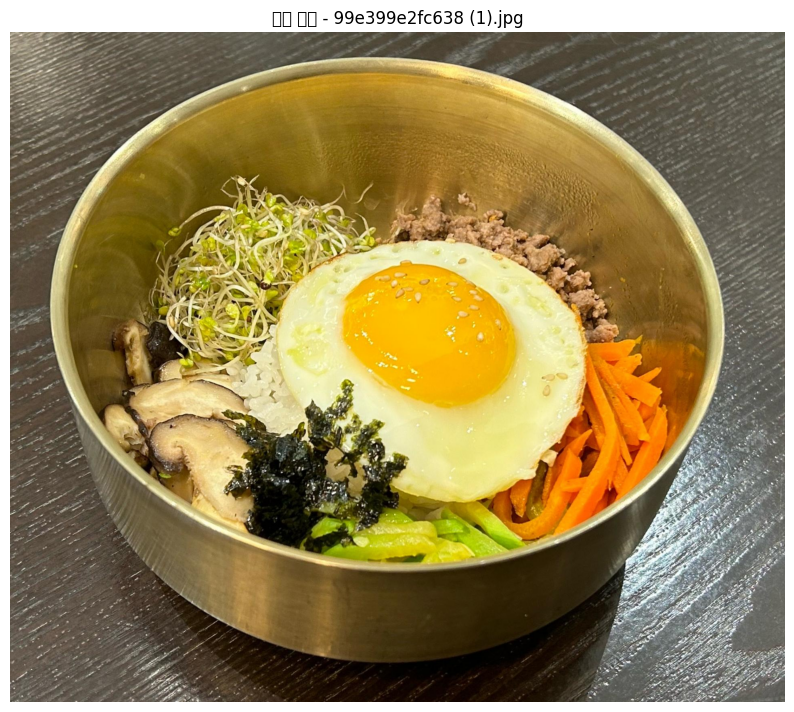

In [9]:
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2

# 1) 테스트 이미지 여러 장 업로드
uploaded = files.upload()

# 2) 학습된 YOLO 모델 로드
model = YOLO('runs/train/yolov8n_food2/weights/best.pt')

# 3) 업로드된 모든 이미지에 대해 반복 처리
for img_path in uploaded.keys():
    print(f"이미지 파일: {img_path}")

    # 4) 예측 수행
    results = model(img_path)

    # 5) 탐지된 음식 종류 및 개수 출력
    detected = {}
    for result in results:
        boxes = result.boxes
        class_ids = boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print("탐지된 음식 종류 및 개수 :", detected)

    # 6) 이미지 시각화
    annotated_img = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # 7) 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'탐지 결과 - {img_path}')
    plt.show()

In [8]:
!ls -al runs/train/yolov8n_food/weights/
!ls -al runs/train/yolov8n_food2/weights/



total 8
drwxr-xr-x 2 root root 4096 Jun 11 10:19 .
drwxr-xr-x 3 root root 4096 Jun 11 10:19 ..
total 12240
drwxr-xr-x 2 root root    4096 Jun 11 10:20 .
drwxr-xr-x 3 root root    4096 Jun 11 11:11 ..
-rw-r--r-- 1 root root 6262435 Jun 11 11:11 best.pt
-rw-r--r-- 1 root root 6262435 Jun 11 11:11 last.pt
